### 1. Re-code the house price machine learning


##### 1. Random Choose Method to get optimal *k* and *b*


In [16]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import random

In [3]:
data = load_boston()

In [5]:
X, y = data['data'], data['target']

In [8]:
def draw_rm_and_price():
    plt.scatter(X[:, 5], y)

In [17]:
def price(rm, k, b):
    return k * rm + b 

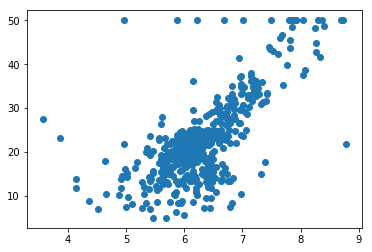

In [15]:
draw_rm_and_price()

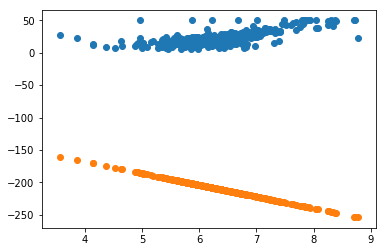

In [21]:
X_rm = X[:,5]
k = random.randint(-100,100)
b = random.randint(-100,100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

In [22]:
def loss(y, y_predict):
    return sum((y_i - y_predict_i)**2 for y_i, y_predict_i in zip(list(y), list(y_predict))) / len(list(y))

In [23]:
loss(y,price_by_random_k_and_b)

54070.10388464025

In [54]:
iter_times = 1000
min_loss = float('inf')
best_k, best_b = None, None

for i in range(iter_times):
    k = random.randint(-100,100)
    b = random.randint(-100,100)
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

    current_loss = loss(y,price_by_random_k_and_b)

    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

When time is : 0, get best_k: -75 best_b: -35, and the loss is: 283242.9770145749
When time is : 1, get best_k: -12 best_b: 74, and the loss is: 836.5240117944666
When time is : 16, get best_k: 2 best_b: -6, and the loss is: 323.28660590513863
When time is : 32, get best_k: -8 best_b: 78, and the loss is: 214.64242966007905
When time is : 41, get best_k: 12 best_b: -62, and the loss is: 130.86131456126478
When time is : 164, get best_k: 10 best_b: -41, and the loss is: 44.468997430830086


##### 2.Supervised Direction to get optimal *k* and *b*


In [61]:
iter_times = 1000
min_loss = float('inf')

best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

direction = [
    (+1, -1),  
    (+1, +1), 
    (-1, -1), 
    (-1, +1),
]

next_direction = random.choice(direction)
scalar = 0.1

for i in range(iter_times):
    k_direction, b_direction = next_direction
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    
    price_by_random_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    current_loss = loss(y,price_by_random_k_and_b)

    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        
        next_direction = next_direction
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    else:
        next_direction = random.choice(direction)

When time is : 0, get best_k: 73.34190561265922 best_b: 70.8880518305709, and the loss is: 261445.30004702247
When time is : 1, get best_k: 73.24190561265922 best_b: 70.78805183057091, and the loss is: 260697.51842276406
When time is : 2, get best_k: 73.14190561265923 best_b: 70.68805183057091, and the loss is: 259950.80797037305
When time is : 3, get best_k: 73.04190561265924 best_b: 70.58805183057092, and the loss is: 259205.1686898495
When time is : 4, get best_k: 72.94190561265924 best_b: 70.48805183057092, and the loss is: 258460.60058119363
When time is : 5, get best_k: 72.84190561265925 best_b: 70.38805183057093, and the loss is: 257717.10364440514
When time is : 6, get best_k: 72.74190561265925 best_b: 70.28805183057094, and the loss is: 256974.67787948388
When time is : 7, get best_k: 72.64190561265926 best_b: 70.18805183057094, and the loss is: 256233.32328643082
When time is : 8, get best_k: 72.54190561265926 best_b: 70.08805183057095, and the loss is: 255493.03986524412
Whe

## 2. Answer following questions:

##### 1. Why do we need machine learning methods instead of creating a complicated formula?


Ans: 因为有时候问题比较复杂，很难直接找到一个复杂的函数去拟合。

##### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans: 随机性太大，需要很多迭代次数。

##### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans: 第二种方法比第一种好，因为每次迭代都是朝着更优的方向进行；但是第二种方法每次迭代loss可能下降很少，需要迭代很多次。

##### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans: 因为导数为0的点可能为最优的点。

##### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans: 梯度是一个向量，方向与最大方向导数的方向一致；下降的意思是沿着负梯度方向减小函数值进行优化。

##### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans: 梯度下降法一致沿着loss变小的方向进行，迭代速度快。

##### 7. Using the simple words to describe: What's the machine leanring.

Ans: 数据驱动、最优化

## 3. Finish the search problem


In [50]:
import requests
from bs4 import BeautifulSoup 
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt

In [145]:
url = 'http://www.bjsubway.com/station/zjgls/'
html = requests.get(url).content  
soup = BeautifulSoup(html, 'lxml') 

In [146]:
station = []

In [147]:
for stat in soup.select('table > tbody > tr > th'):
    stat = str(stat)
    station.append(stat[stat.find('>')+1:stat.find('――')])

In [152]:
station_connection = defaultdict(list)

In [153]:
for stat in soup.select('table > tbody > tr > th'):
    stat = str(stat)
    stat1 = stat[stat.find('>')+1:stat.find('――')]
    stat2 = stat[stat.find('――')+2:stat.find('</th>')]
    station_connection[stat1].append(stat2)
    station_connection[stat2].append(stat1)

In [154]:
station_distance = {}

In [155]:
for i in range(len(soup.select('table > tbody > tr > th'))):
    stat = str(soup.select('table > tbody > tr > th')[i])
    stat1 = stat[stat.find('>')+1:stat.find('――')]
    stat2 = stat[stat.find('――')+2:stat.find('</th>')]
    dis = str(soup.select('table > tbody > tr > td:nth-child(2)')[i])
    distance = int(dis[dis.find('>')+1:dis.find('</td>')])
    station_distance[stat1+'-'+stat2] = distance
    station_distance[stat2+'-'+stat1] = distance

In [156]:
subway_graph = nx.Graph(station_connection)

/Users/liujunhong/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


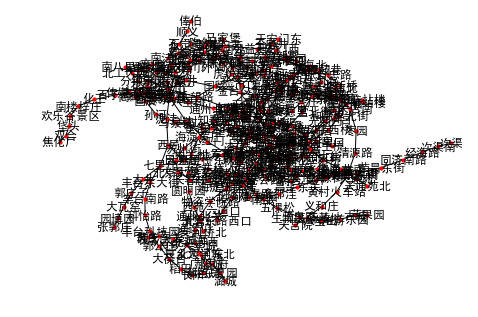

In [157]:
nx.draw(subway_graph, with_labels=True, node_size=10)

In [207]:
def search(start, destination, connection_grpah, sort_candidate):
    pathes = [[start]]
    path_all = []
    visitied = set()
    
    while pathes: # if we find existing pathes
        path = pathes.pop(0)
        froninter = path[-1]
        if froninter in visitied: continue
            
        successors = connection_grpah[froninter]
        
        for city in successors:
            if city in path: continue  # eliminate loop
                
            new_path = path + [city]
            
            pathes.append(new_path)
            
            if city == destination: path_all.append(new_path)
        
        visitied.add(froninter)
        pathes = sort_candidate(pathes)
    return path_all[0]

In [212]:
def transfer_stations_first(pathes): 
    return sorted(pathes, key=len)

In [213]:
def pretty_print(stations):
    print('🚗->'.join(stations))

In [214]:
pretty_print(search('海淀黄庄', '北京站', station_connection, transfer_stations_first))

海淀黄庄🚗->知春里🚗->知春路🚗->大钟寺🚗->西直门🚗->车公庄🚗->平安里🚗->北海北🚗->南锣鼓巷🚗->东四🚗->朝阳门🚗->建国门🚗->北京站
